In [4]:
import numpy as np
import matplotlib.pyplot as plt; plt.ion()

from scipy.io import mmread
from sklearn.decomposition import PCA
from umap import UMAP
from hdbscan import HDBSCAN

A helper function to visualize the distribution of dataset values at the various stages of preprocessing:

In [5]:
def summarize(X):
    print("Dimensions: ", X.shape)

    # compute some simple metrics to get a feel for the distribution of values
    print("Min    : ", np.min(X))
    print("Mean   : ", np.mean(X))
    print("Median : ", np.median(X))
    print("99.9%  : ", np.percentile(X.ravel(), 99.9))
    print("Max    : ", np.max(X))

    # plot distribution
    fig, ax = plt.subplots(1,1)
    ax.hist(X.ravel(), bins=100)
    ax.set_xlabel('Counts')
    ax.set_ylabel('Frequency')
    plt.show()

# Load the data:

Dimensions:  (9128, 27998)
Min    :  0
Mean   :  0.2623772026347944
Median :  0.0
99.9%  :  27.0
Max    :  6916


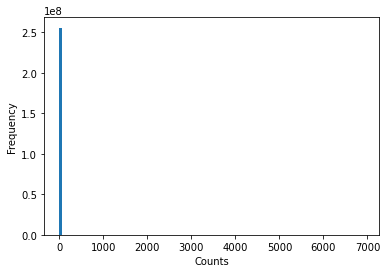

In [6]:
file_path = 'filtered_gene_bc_matrices/mm10/matrix.mtx'
X = mmread(file_path)
X = np.array(X.todense().transpose())
summarize(X)

# Preprocess the data (a.k.a quality control)

## 1.1 Look at total counts

Dimensions:  (9128,)
Min    :  2223
Mean   :  7346.036919368975
Median :  6360.5
99.9%  :  37470.50300000044
Max    :  58312


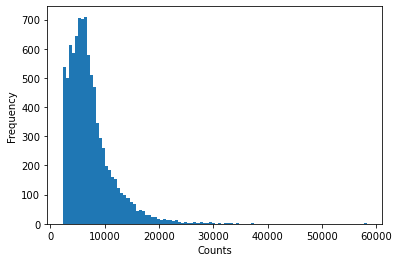

In [7]:
total_reads_per_sample = X.sum(axis=1)
summarize(total_reads_per_sample)

In [8]:
# Lower end has already been truncated (<2000), need to truncate upper end
threshold = 20000
below_threshold = total_reads_per_sample<threshold
below_threshold

array([ True,  True,  True, ...,  True,  True,  True])

Dimensions:  (8965,)
Min    :  2223
Mean   :  7010.351031790296
Median :  6296.0
99.9%  :  19562.684000000037
Max    :  19963


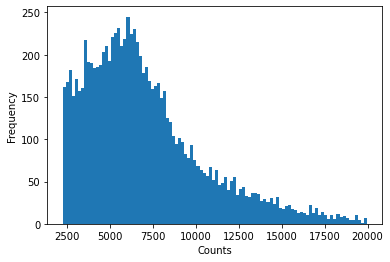

In [9]:
truncated_reads_per_sample = X[below_threshold]
total_reads_truncated=truncated_reads_per_sample.sum(axis=1)
summarize(total_reads_truncated)

## 1.2 Look at total genes per cell

Dimensions:  (8965, 27998)
Min    :  0
Mean   :  0.25038756453283434
Median :  0.0
99.9%  :  26.0
Max    :  6710


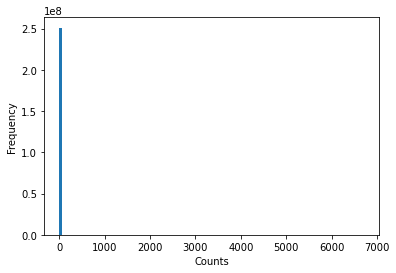

In [10]:
summarize(truncated_reads_per_sample)

Dimensions:  (1, 8965)
Min    :  2223
Mean   :  7010.351031790296
Median :  6296.0
99.9%  :  19562.684000000037
Max    :  19963


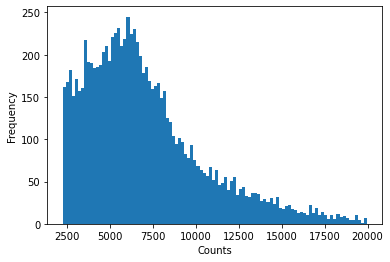

In [11]:
total_genes = total_reads_truncated[total_reads_truncated.sum()>0]
total_genes
summarize(total_genes)

Dimensions:  (8965,)
Min    :  110
Mean   :  2539.5939765755716
Median :  2490.0
99.9%  :  4979.036000000002
Max    :  5308


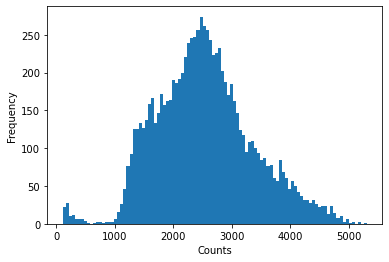

In [12]:
indicated_matrix = truncated_reads_per_sample > 0
total_gene_expressed = indicated_matrix.sum(axis=1)
summarize(total_gene_expressed)

Dimensions:  (8856, 27998)
Min    :  0
Mean   :  0.25088953314706375
Median :  0.0
99.9%  :  26.0
Max    :  4665


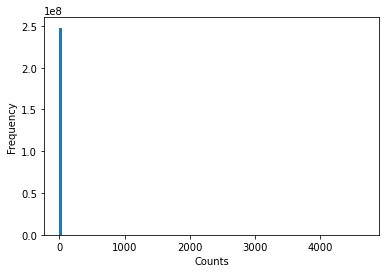

In [20]:
threshold_gene_expression = 1000
index = total_gene_expressed > threshold_gene_expression
samples_with_enough_genes = truncated_reads_per_sample[index]
summarize(samples_with_enough_genes)

Dimensions:  (8856,)
Min    :  1014
Mean   :  2566.8285907859076
Median :  2503.0
99.9%  :  4979.145
Max    :  5308


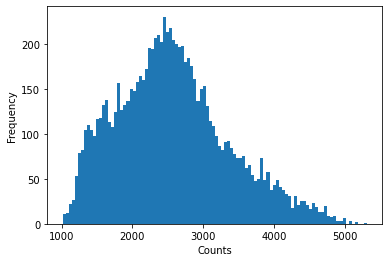

In [21]:
indicator = samples_with_enough_genes > 0
sum_samples_with_enough_genes = indicator.sum(axis=1)
summarize(sum_samples_with_enough_genes)

## 1.3 Gene QC

In [23]:
threshold = 0
genes_to_keep = samples_with_enough_genes > threshold
genes_with_enough_samples = samples_with_enough_genes[:,genes_to_keep]

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
indicator = genes_with_enough_samples > 0
sum_genes_with_enough_samples = indicator.sum(axis=0)
summarize(sum_genes_with_enough_samples)
#Number of genes that are present in each cell

In [ ]:
threshold = np.percentile(sum_genes_with_enough_samples,10)
genes_to_keep = total_samples_with_genes > threshold
genes_with_enough_samples = samples_with_enough_genes[:,genes_to_keep]

indicator = genes_with_enough_samples > 0
sum_genes_with_enough_samples = indicator.sum(axis=0)
summarize(sum_genes_with_enough_samples)

# Dimensionality reduction using PCA

In [ ]:
# We need to make a PCA object and fit the data to the PCA object

# pca_instance = PCA()
# pca_instance.fit(genes_with_enough_samples)

In [ ]:
# Less samples than featuers - PCA only computes first 8000 dimensions

D = genes_with_enough_samples.shape[1]
fig, ax = plt.subplots(1,1)
ax.plot(np.arange(1, 1000+1), pca_instance.explained_variance_ratio_[:1000])
ax.set_xlabel('Total components')
ax.set_ylabel('Variance explained / Total variance')
ax.set_title('Scree plot')
plt.show()


pca_transformed = PCA(n_components=d, whiten=False).fit_transform(X)

In [16]:
print(genes_with_enough_samples.shape)

NameError: name 'genes_with_enough_samples' is not defined

# Dimensionality reduction using UMAP

# Clustering using HDBSCAN